In [1]:
from scipy import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

### Data collection

I obtained a list of world cities from DataHub.io, and the United Nations' human development index (HDI) from Humdata. 

In [2]:
# DataHub.io's list of world cities
data_url = "https://pkgstore.datahub.io/core/population-city/unsd-citypopulation-year-fm/archive/11a5a8ae5e221738652d14092467b028/unsd-citypopulation-year-fm.csv"

# Might need a relatively new version of pandas
data = pd.read_csv(data_url)

In [3]:
hdi_url = 'https://data.humdata.org/dataset/8708db1a-9f29-4379-852d-1b13325134c7/resource/ccc764d4-1e53-4370-83fa-562e860e72b5/download/human-development-index-hdi-2014.csv'
data_hdi = pd.read_csv(hdi_url, nrows=188, encoding = "ISO-8859-1")

In [4]:
# Pre-process the city data
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')
data = data[data['Year']==str(2010)]
data['population'] = data['Value']

In [5]:
data_hdi.head()

,Rank,Location,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank
0,1,Norway,0.944,81.6,17.5,12.6,"64,992",5
1,2,Australia,0.935,82.4,20.2,13.0,"42,261",17
2,3,Switzerland,0.930,83.0,15.8,12.8,"56,431",6
3,4,Denmark,0.923,80.2,18.7,12.7,"44,025",11
4,5,Netherlands,0.922,81.6,17.9,11.9,"45,435",9


In [6]:
data[(data['Value'] < 40000) & (data['Value'] > 25000)].head()

,Country or Area,Year,Area,Sex,City,City type,Record Type,Reliability,Source Year,Value,Value Footnotes,population
587,Austria,2010,Total,Male,Sankt Pölten,City proper,Estimate - de jure,"Final figure, complete",2010,25008.0,14,25008.0
596,Austria,2010,Total,Female,Sankt Pölten,City proper,Estimate - de jure,"Final figure, complete",2010,26680.0,14,26680.0
1304,Brazil,2010,Total,Male,Abaeteluba,City proper,Census - de jure - complete tabulation,"Final figure, complete",2012,39835.0,NaN,39835.0
1306,Brazil,2010,Total,Male,Açailândia,City proper,Census - de jure - complete tabulation,"Final figure, complete",2012,38571.0,NaN,38571.0
1307,Brazil,2010,Total,Male,Açailândia,Urban agglomeration,Census - de jure - complete tabulation,"Final figure, complete",2012,38571.0,NaN,38571.0


### Join the tables

By joining the tables we can now assign individual cities to a urbanisation index. We assume a city with a HDI too low or too high will not be a potential customer of the product.

In [7]:
data_merge = pd.merge(data, data_hdi, left_on='Country or Area', right_on="Location")

In [8]:
data_merge.head()

,Country or Area,Year,Area,Sex,City,City type,Record Type,Reliability,Source Year,Value,Value Footnotes,population,Rank,Location,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank
0,Andorra,2010,Total,Male,ANDORRA LA VELLA,Urban agglomeration,Estimate - de jure,"Final figure, complete",2010,11750.0,NaN,11750.0,34,Andorra,0.845,81.3,13.5,9.6,"43,978",-18
1,Andorra,2010,Total,Female,ANDORRA LA VELLA,Urban agglomeration,Estimate - de jure,"Final figure, complete",2010,11755.0,NaN,11755.0,34,Andorra,0.845,81.3,13.5,9.6,"43,978",-18
2,Australia,2010,Total,Male,Adelaide,City proper,Estimate - de jure,Provisional figure,2012,588259.0,9,588259.0,2,Australia,0.935,82.4,20.2,13.0,"42,261",17
3,Australia,2010,Total,Male,Albury-Wodonga,City proper,Estimate - de jure,Provisional figure,2012,52541.0,9,52541.0,2,Australia,0.935,82.4,20.2,13.0,"42,261",17
4,Australia,2010,Total,Male,Brisbane,City proper,Estimate - de jure,Provisional figure,2012,1013453.0,9,1013453.0,2,Australia,0.935,82.4,20.2,13.0,"42,261",17


### Looking at the data set

In [43]:
percentile(data_merge['Human Development Index (HDI) '], [10,25,50,75,90])

array([0.715, 0.755, 0.779, 0.873, 0.891])

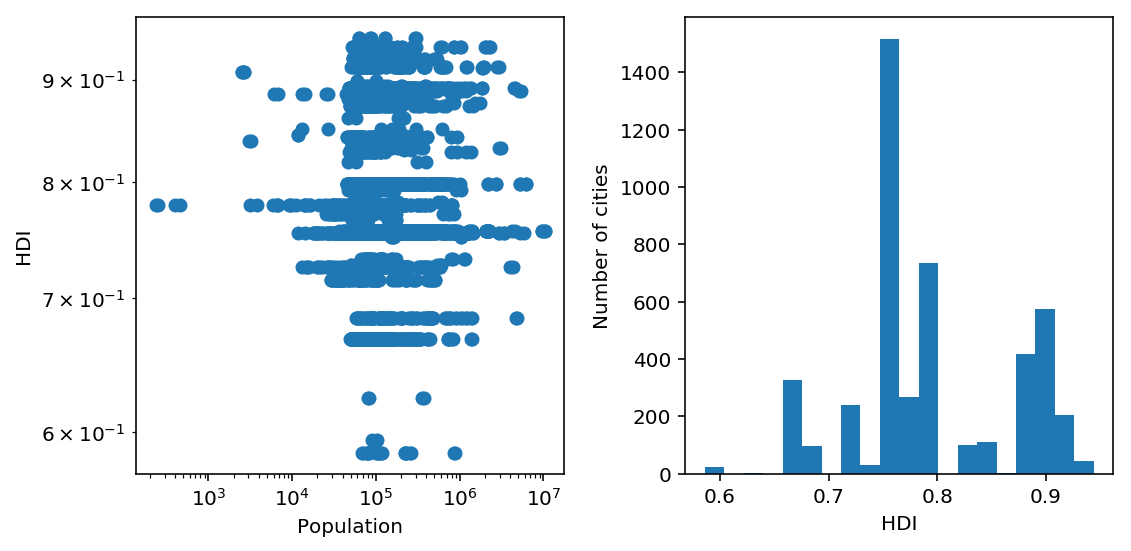

In [9]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.loglog(data_merge['population'], data_merge['Human Development Index (HDI) '], 'o')
plt.xlabel('Population')
plt.ylabel('HDI')

plt.subplot(122)
plt.hist(data_merge['Human Development Index (HDI) '], bins=20);
plt.xlabel('HDI')
plt.ylabel('Number of cities')
plt.tight_layout()

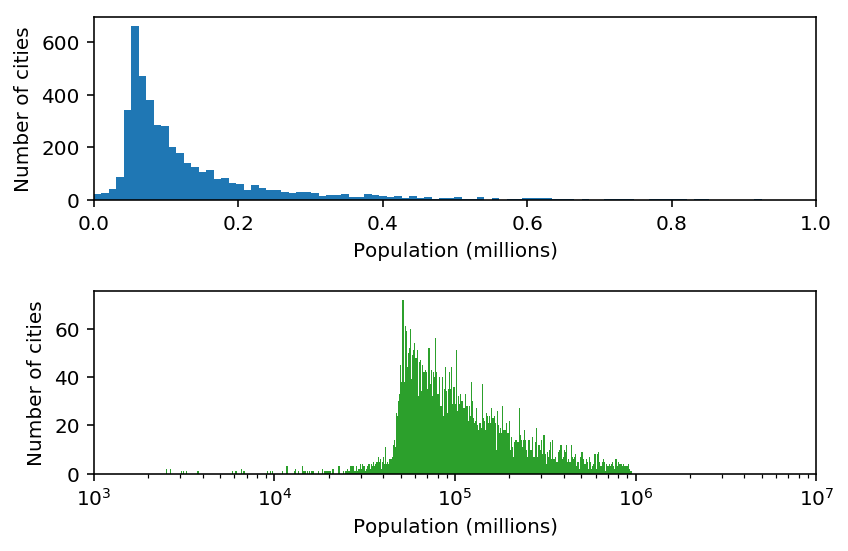

In [10]:
plt.subplot(211)
plt.hist(data_merge[data_merge['Year']==str(2010)]['population']/1e6, bins=1000, color='C0');
plt.xlabel('Population (millions)')
plt.ylabel('Number of cities')
plt.xlim([0,1])

plt.subplot(212)
bins = linspace(1,1e6,10)
logbins = logspace(log10(bins[0]),log10(bins[-1]),1000)
plt.hist(data_merge[data_merge['Year']==str(2010)]['population'], bins=logbins, color='C2');
plt.xlabel('Population (millions)')
plt.ylabel('Number of cities')
plt.xlim([1e3,1e7])
plt.xscale('log')

plt.tight_layout()

In [11]:
# Number of big cities 
# note: there are 101 cities with more than 1 million people. 
data_merge[data_merge['population']>1e6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 4 to 4598
Data columns (total 20 columns):
Country or Area                           101 non-null object
Year                                      101 non-null object
Area                                      101 non-null object
Sex                                       101 non-null object
City                                      101 non-null object
City type                                 101 non-null object
Record Type                               101 non-null object
Reliability                               101 non-null object
Source Year                               101 non-null object
Value                                     101 non-null float64
Value Footnotes                           17 non-null object
population                                101 non-null float64
Rank                                      101 non-null int64
Location                                  101 non-null object
Human Development Index (H

### Calculation of market sizes


To arrive at a metric for pricing we assume that in a city of population $P$:
* There will be municipal offices proportional to $P$, each one of which will serve $N=10,000$ people. 
* Each municipal office has $n=5$ departments and takes 1 license each.
* Each license will cost $x$ USD per month.

Number of licenses will be $Pn /N$

Annual revenue from these licenses will be $12Pnx/N$

In [33]:
unit_price = 150        # monthly cost of a single license for 5 users 
num_departments = 5    # number of departments in a small municipal office
factor = 10000          # number of ppl served by one license in one department

data_merge['num_licenses'] = (data_merge['population']/factor)*num_departments

Text(0,0.5,'Total market potential (million)')

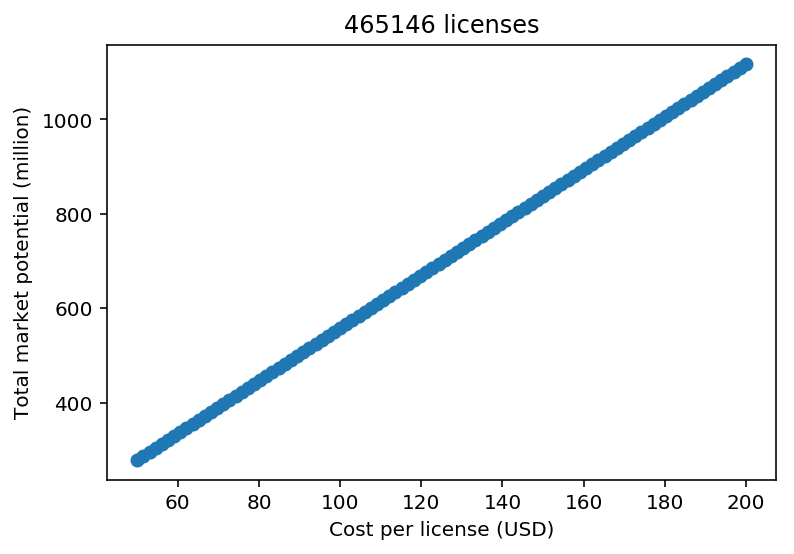

In [34]:
possible_prices =linspace(50,200,100)
for i in range(len(possible_prices)):
    unit_price = possible_prices[i]
    data_merge['revenue'] = data_merge['num_licenses'] * 12 * possible_prices[i]
    
    plt.plot(possible_prices[i], int(sum(data_merge['revenue']))/1e6, 'o-', c='C0')

plt.title( str(int(sum(data_merge['num_licenses']))) + ' licenses' )
plt.xlabel('Cost per license (USD)')
plt.ylabel('Total market potential (million)')

In [57]:
data_merge['revenue'] = data_merge['num_licenses'] * 12 * 100
print(sum(data_merge['revenue']))


558175763.3999913


In [36]:
data_merge[data_merge['Country or Area']=='Singapore']

,Country or Area,Year,Area,Sex,City,City type,Record Type,Reliability,Source Year,Value,...,Rank,Location,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,num_licenses,revenue
4378,Singapore,2010,Total,Male,SINGAPORE,City proper,Census - de jure - complete tabulation,"Final figure, complete",2011,1861133.0,...,11,Singapore,0.912,83.0,15.4,10.6,"76,628",-7,930.5665,2233359.6
4379,Singapore,2010,Total,Female,SINGAPORE,City proper,Census - de jure - complete tabulation,"Final figure, complete",2011,1910588.0,...,11,Singapore,0.912,83.0,15.4,10.6,"76,628",-7,955.2940,2292705.6


As an example we will supply about 1000 licenses if the Singapore government fully utilises all licenses. This seems reasonable -- there are about 145,000 civil servants, so this converts to a user base of less than 1%.

#### Addressable market

One way to segment an addressable market is to focus on large cities. So here we see that our estimate revenue approximately halves if we focus on cities larger than 500k people.

/Users/beng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


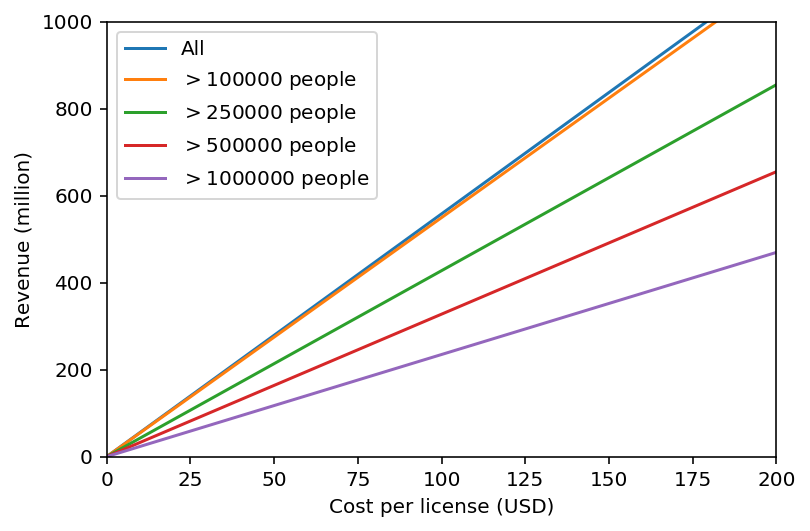

In [40]:
possible_prices =linspace(0,200,5)

my_thresholds = [1, 100000, 250000, 500000, 1000000]
pop_factor = 2  # because our population data is segmented male/female
my_cols = ['C0', 'C1', 'C2', 'C3', 'C4']
my_labels = ['All', '$>100000$ people', '$>250000$ people', '$>500000$ people', '$>1000000$ people']
data_store = []

for mt,mc,ml in zip(my_thresholds, my_cols, my_labels):
    data_filt = data_merge[data_merge['population']>mt/pop_factor]
    data_store = []
    for i in range(len(possible_prices)):
        unit_price = possible_prices[i]
        data_filt['revenue'] = data_filt['num_licenses'] * 12 * possible_prices[i]
        data_store.append([possible_prices[i],int(sum(data_filt['revenue']))/1e6])
        
    plt.plot(array(data_store)[:,0],array(data_store)[:,1], c=mc, label=ml)

plt.legend(loc='best')
plt.xlabel('Cost per license (USD)')
plt.ylabel('Revenue (million)')
plt.ylim([0,1000]);
plt.xlim([0,200]);

A second way to segment the market might be based on HDI.

In [44]:
percentile(data_merge['Human Development Index (HDI) '], [10,25,50,75,90])

array([0.715, 0.755, 0.779, 0.873, 0.891])

/Users/beng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


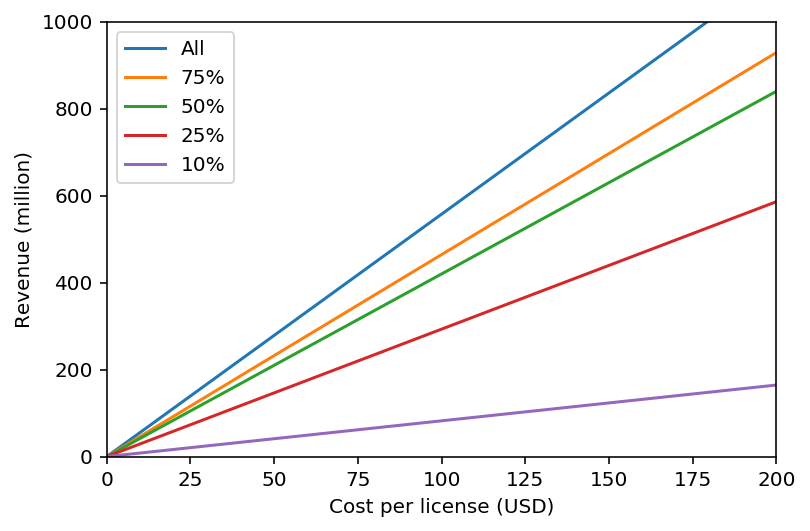

In [47]:
possible_prices =linspace(0,200,5)

my_hdi_percentiles = [100, 90, 75, 50, 25]
my_hdi = percentile(data_merge['Human Development Index (HDI) '], my_hdi_percentiles)
pop_factor = 2  # because our population data is segmented male/female
my_cols = ['C0', 'C1', 'C2', 'C3', 'C4']
my_labels = ['All', '75%', '50%', '25%', '10%']
data_store = []

for mt,mc,ml in zip(my_hdi, my_cols, my_labels):
    data_filt = data_merge[data_merge['Human Development Index (HDI) '] < mt]
    data_store = []
    for i in range(len(possible_prices)):
        unit_price = possible_prices[i]
        data_filt['revenue'] = data_filt['num_licenses'] * 12 * possible_prices[i]
        data_store.append([possible_prices[i],int(sum(data_filt['revenue']))/1e6])
        
    plt.plot(array(data_store)[:,0],array(data_store)[:,1], c=mc, label=ml)

plt.legend(loc='best')
plt.xlabel('Cost per license (USD)')
plt.ylabel('Revenue (million)')
plt.ylim([0,1000]);
plt.xlim([0,200]);

The above calculation is a high-pass i.e. didn't exclude high income nations. So let's say we exclude the top 10% this time.

/Users/beng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


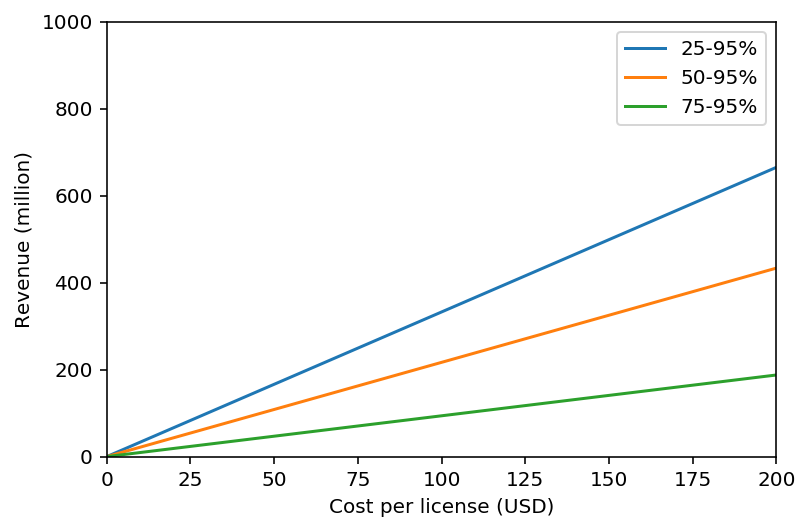

In [54]:
possible_prices =linspace(0,200,5)
top_range_percentile = 95
my_hdi_percentiles = [25,50,75]
my_hdi = percentile(data_merge['Human Development Index (HDI) '], my_hdi_percentiles)
pop_factor = 2  # because our population data is segmented male/female
my_cols = ['C0', 'C1', 'C2', 'C3', 'C4']
my_labels = ['25-'+str(top_range_percentile)+'%', '50-'+str(top_range_percentile)+'%', '75-'+str(top_range_percentile)+'%']
data_store = []

for mt,mc,ml in zip(my_hdi, my_cols, my_labels):
    data_filt = data_merge[(data_merge['Human Development Index (HDI) '] > mt) & (data_merge['Human Development Index (HDI) '] < percentile(data_merge['Human Development Index (HDI) '], top_range_percentile))]
    data_store = []
    for i in range(len(possible_prices)):
        unit_price = possible_prices[i]
        data_filt['revenue'] = data_filt['num_licenses'] * 12 * possible_prices[i]
        data_store.append([possible_prices[i],int(sum(data_filt['revenue']))/1e6])
        
    plt.plot(array(data_store)[:,0],array(data_store)[:,1], c=mc, label=ml)

plt.legend(loc='best')
plt.xlabel('Cost per license (USD)')
plt.ylabel('Revenue (million)')
plt.ylim([0,1000]);
plt.xlim([0,200]);

### Segmented addressable market

Now we just apply the two in series. Let's say we target all cities 500k and larger.

/Users/beng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


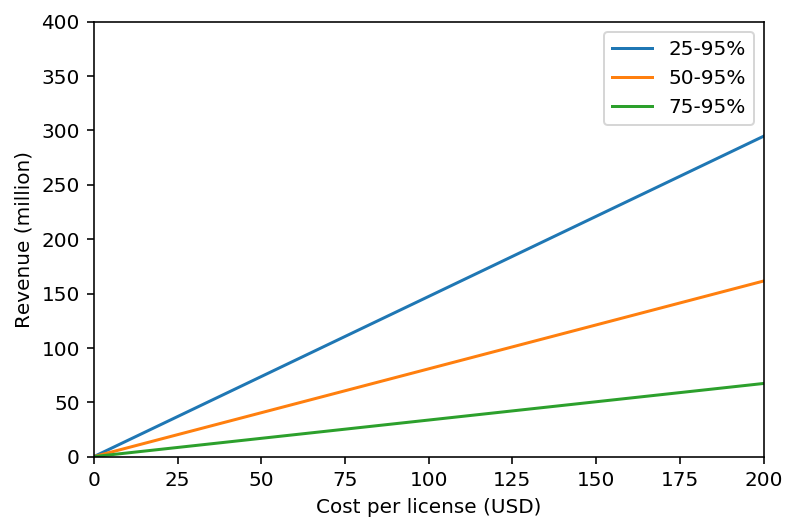

In [56]:
possible_prices =linspace(0,200,5)
top_range_percentile = 95
my_hdi_percentiles = [25,50,75]
my_hdi = percentile(data_merge['Human Development Index (HDI) '], my_hdi_percentiles)
pop_factor = 2  # because our population data is segmented male/female
my_cols = ['C0', 'C1', 'C2', 'C3', 'C4']
my_labels = ['25-'+str(top_range_percentile)+'%', '50-'+str(top_range_percentile)+'%', '75-'+str(top_range_percentile)+'%']
data_store = []

for mt,mc,ml in zip(my_hdi, my_cols, my_labels):
    data_filt = data_merge[(data_merge['population'] > 500000) & (data_merge['Human Development Index (HDI) '] > mt) & (data_merge['Human Development Index (HDI) '] < percentile(data_merge['Human Development Index (HDI) '], top_range_percentile))]
    data_store = []
    for i in range(len(possible_prices)):
        unit_price = possible_prices[i]
        data_filt['revenue'] = data_filt['num_licenses'] * 12 * possible_prices[i]
        data_store.append([possible_prices[i],int(sum(data_filt['revenue']))/1e6])
        
    plt.plot(array(data_store)[:,0],array(data_store)[:,1], c=mc, label=ml)

plt.legend(loc='best')
plt.xlabel('Cost per license (USD)')
plt.ylabel('Revenue (million)')
plt.ylim([0,400]);
plt.xlim([0,200]);

Therefore, for a cost per license of USD 100:
* total market potential is about 558 mil
* total addressable market (defined as targeting cities > 500k people) is 300 mil
* segmented addressable market (defined as targeting cities with HDIs from the 25th to 95th percentile) is 150 mil